<a href="https://colab.research.google.com/github/jpdeleon/chronos/blob/master/notebooks/examples-triceratops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import chronos as cr

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443


In [2]:
# pip install git+https://github.com/stevengiacalone/triceratops.git#egg=triceratops

## choose target

In [3]:
tois = cr.get_tois()

In [4]:
#WASP in TOI comments
tois.loc[tois.Comments.str.contains("WASP").astype(bool),["TOI","Comments"]].dropna()

,TOI,Comments
0,101.01,WASP-46 b
1,102.01,WASP 62b
3,104.01,WASP-73
4,105.01,WASP-95
5,106.01,WASP-100b
...,...,...
1807,1833.01,WASP-54 b
1813,1838.01,WASP-92 b
1837,1862.01,CTOI from Ethan Kruse; WASP-150 b
1880,1905.01,WASP-107 b


## FPP calculation using short cadence lightcurve

In [5]:
sc = cr.ShortCadence(toiid=1725, calc_fpp=True)

Target: TOI 1725
Available sectors: [20]
Using sector=20.
Using TESS short cadence.



In [6]:
#check triceratops init
sc.triceratops


Searching mast for TIC 86396382

1 tpf(s) found in sector(s) [20]
Using data from sector 20 only




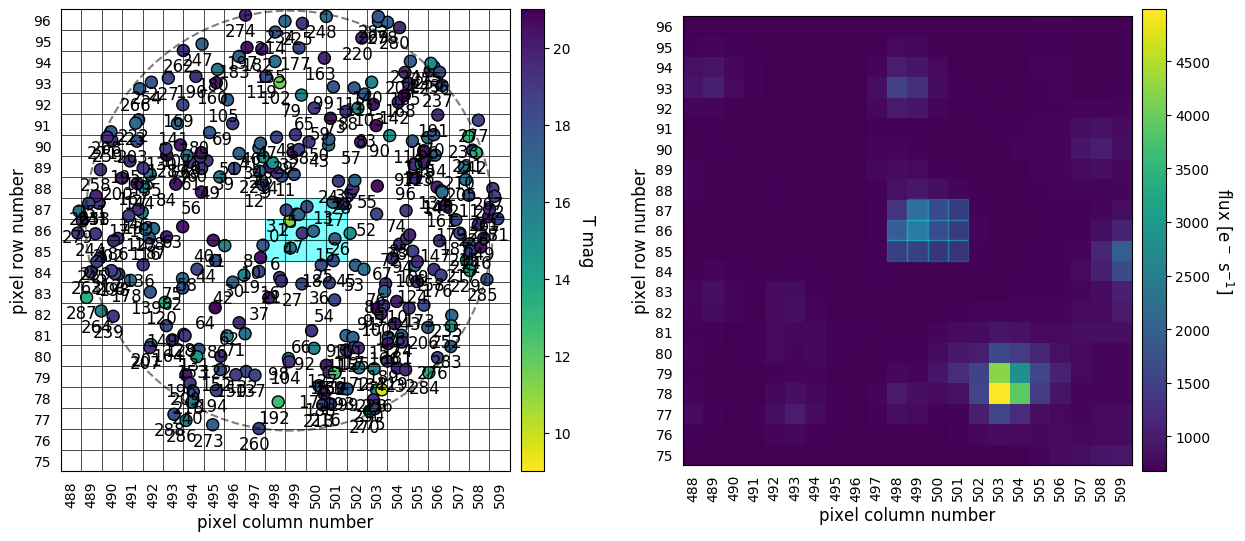

In [7]:
#download tpf from MAST via lightkurve 
tpf = sc.get_tpf()

#plot field
sc.plot_field()

## calculate NEB depths

In [8]:
#depths based on dmag for all stars within encircled region
stars = sc.get_NEB_depths()
stars

,ID,Tmag,ra,dec,mass,rad,Teff,logg,lum,plx,Vmag,Kmag,fluxratio,tdepth
0,86396382,11.0967,97.636653,29.672296,1.17,1.749420,6154.00,4.02046,3.954701,2.312240,11.5690,10.188,9.511781e-01,0.01634
1,721606371,17.4914,97.638770,29.673856,NaN,NaN,NaN,NaN,NaN,-1.015030,NaN,NaN,2.591385e-03,0.00000
2,86396384,17.0451,97.639451,29.673724,NaN,NaN,NaN,NaN,NaN,NaN,18.2666,14.863,4.059251e-03,0.00000
3,86396386,18.4309,97.635554,29.675024,0.64,0.705881,4111.00,4.54678,0.128218,0.311328,19.8676,16.123,7.735688e-04,0.00000
4,721606363,19.0096,97.640627,29.668932,NaN,NaN,NaN,NaN,NaN,-0.762386,20.3447,NaN,8.102429e-04,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,86360042,15.9106,97.606222,29.622927,0.95,0.856950,5441.00,4.54988,0.579856,0.647406,16.7013,14.519,4.690686e-33,0.00000
287,86359996,13.3342,97.575078,29.655678,NaN,8.906480,4841.75,NaN,NaN,0.238461,14.4460,11.482,1.778450e-34,0.00000
288,721606312,18.0054,97.602503,29.624662,NaN,NaN,NaN,NaN,NaN,NaN,18.7739,NaN,3.699191e-34,0.00000
289,721606607,18.7839,97.571996,29.672179,0.69,0.625969,4431.00,4.68381,0.136084,-0.247960,20.0174,NaN,8.545776e-38,0.00000


## get short cadence lightcurve

In [9]:
lc = sc.get_lc()

Searching lightcurvefile for TIC 86396382 (sector 20)
Found 1 lightcurves


In [10]:
flat, trend = sc.get_flat_lc(lc, return_trend=True)

Using biweight filter with window_length=0.37 day


Using period=1.0914 d, epoch=1843.01 BTJD, duration=2.96 hr
Using biweight filter with window_length=0.37 day


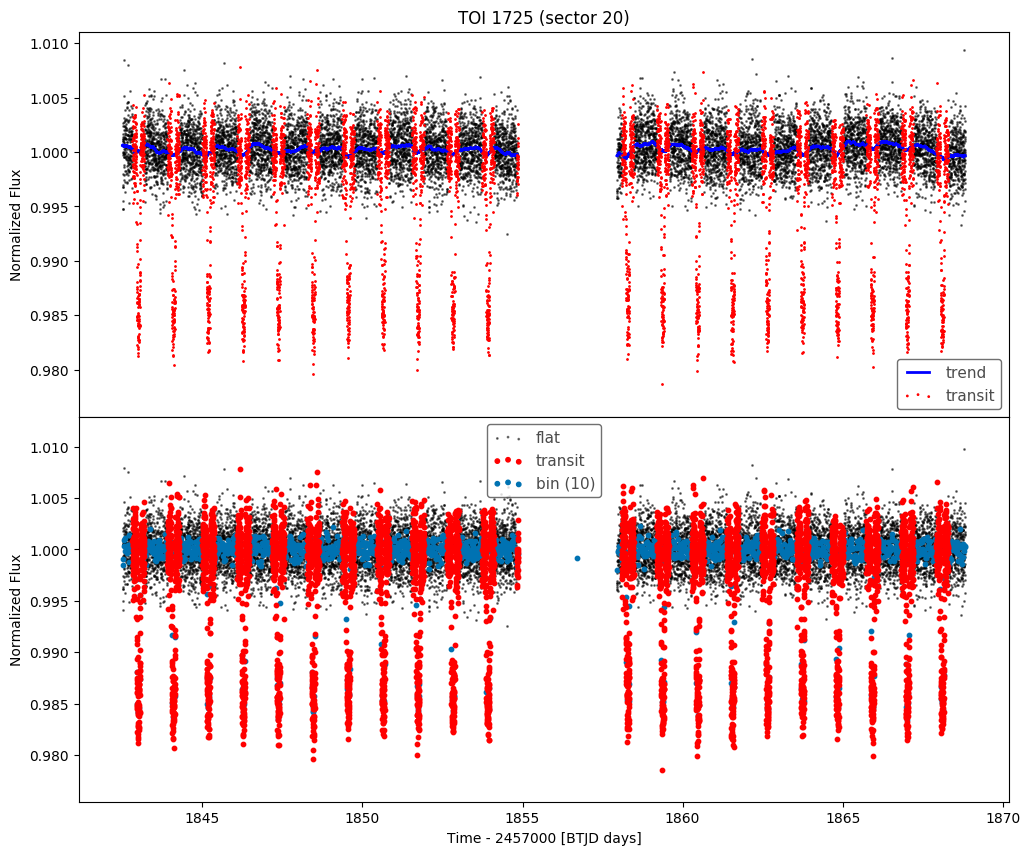

In [11]:
fig = sc.plot_trend_flat_lcs(lc)

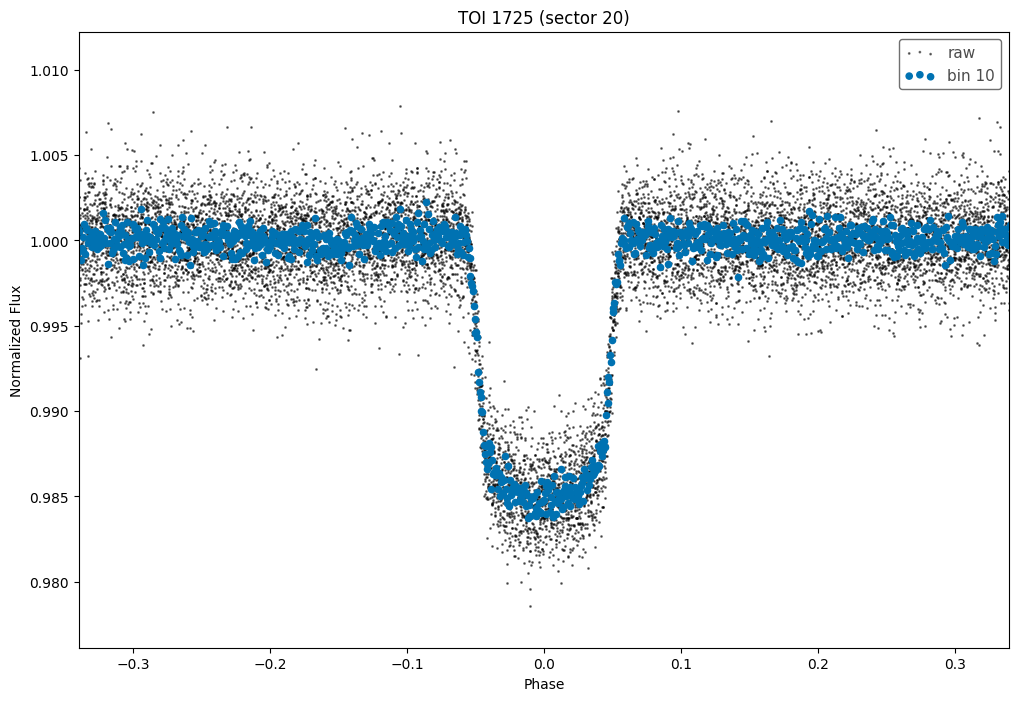

In [12]:
ax = sc.plot_fold_lc(flat)
# ax.set_xlim(-0.1,0.1)

ETA: 29.1 mins
TRILEGAL form submitted.
Calculating TTP and TEB scenario probabilities for 86396382.
Calculating PTP, PEB, STP, and SEB scenario probabilities for 86396382.
Calculating DTP, DEB, BTP, and BEB scenario probabilities for 86396382.
Run time: 3min 48sec
FPP=0.9886


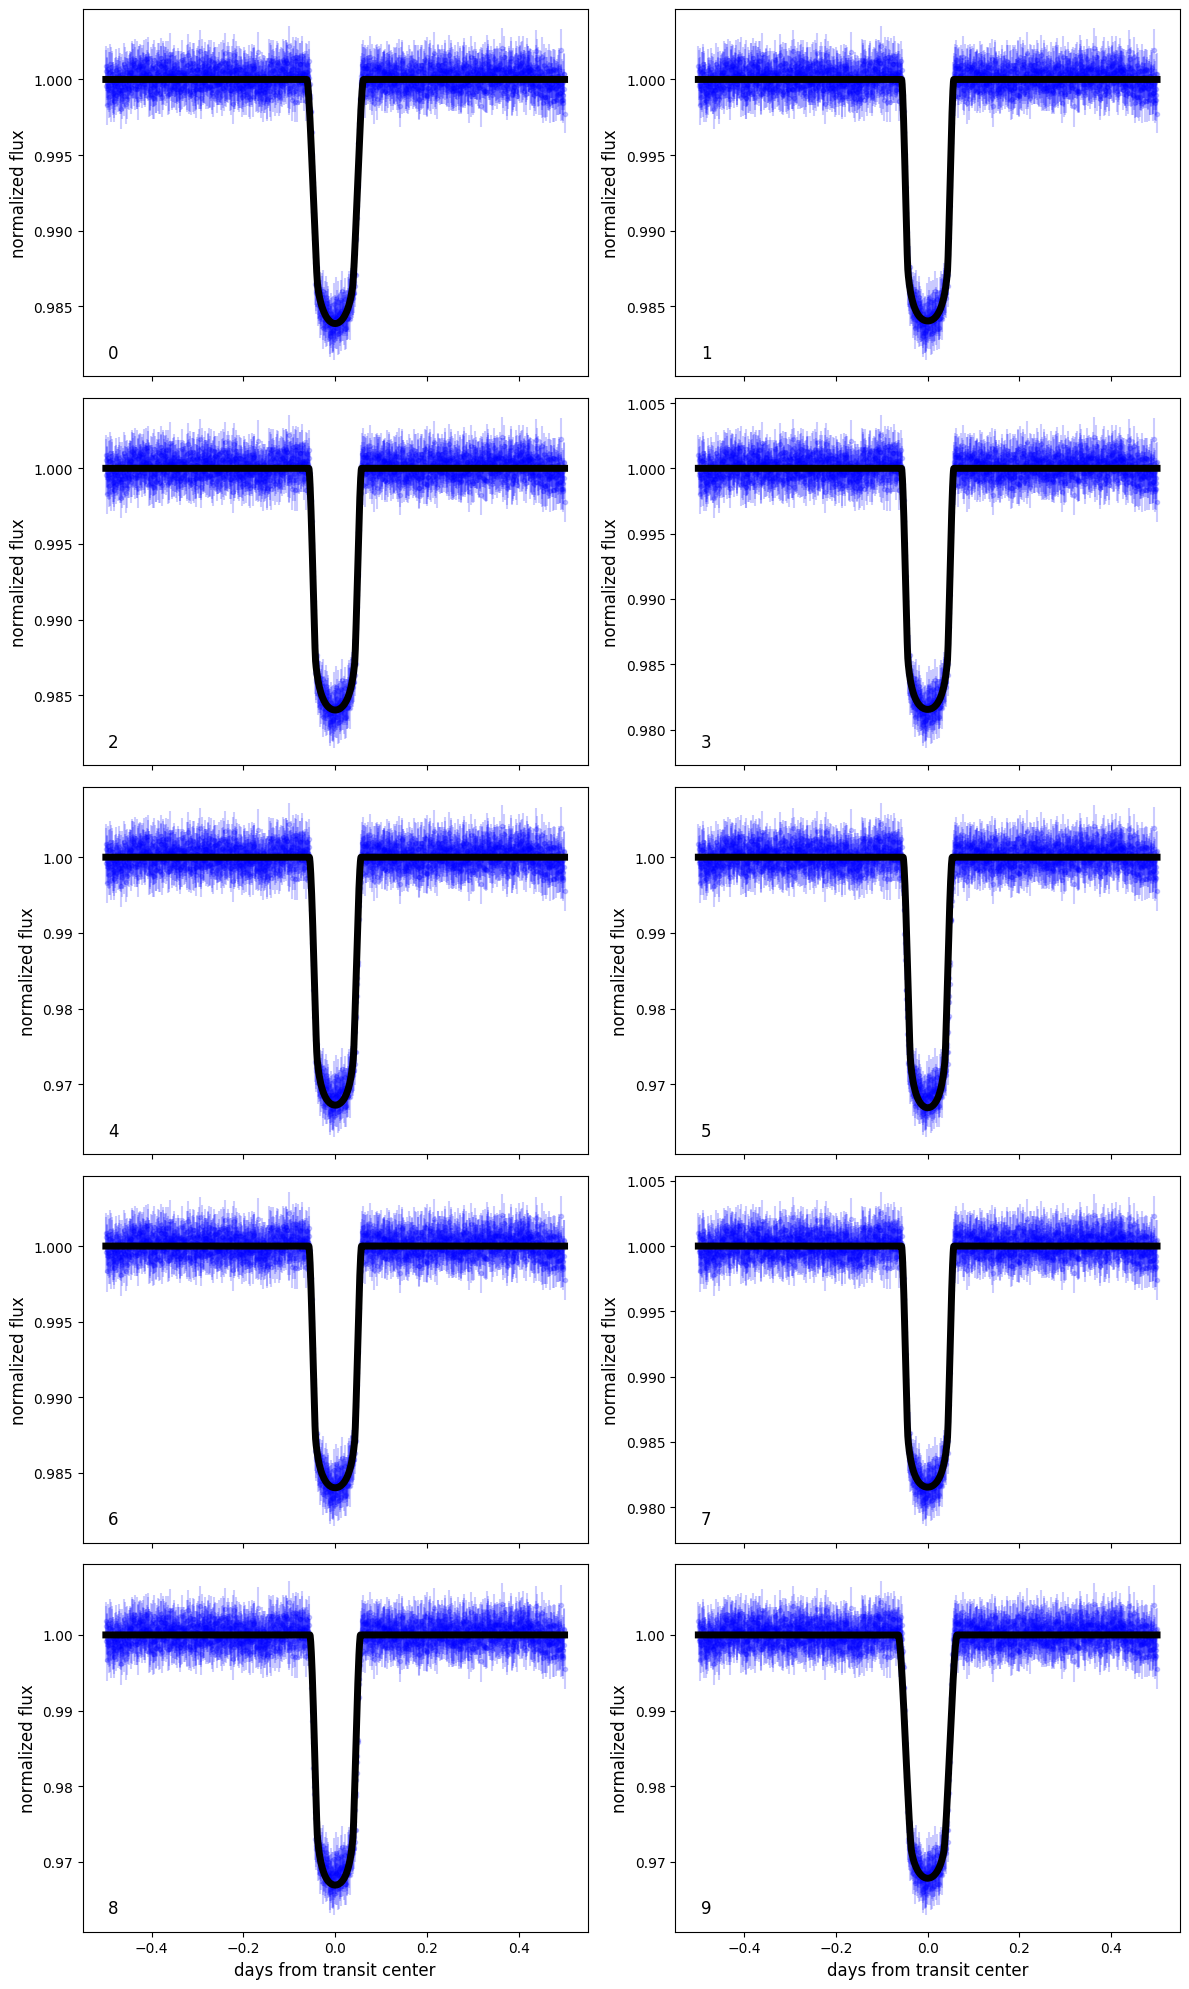

In [14]:
df = sc.get_fpp(flat=flat, bin=10, plot=True)

In [15]:
df

,ID,scenario,ms,rs,Teff,lum,fluxratio,Delta_mag,inc,rp,lnL,lnprior,prob
0,86396382,TTP,1.170000,1.749420,6154.0,3.954701,0.000000,-inf,75.541330,23.651012,-30.338893,-12.693422,4.363664e-15
1,86396382,TEB,1.374549,1.523452,6593.0,3.950786,0.000000,-inf,84.698461,0.181457,-0.018755,-10.405274,6.330674e-01
2,86396382,PTP,1.374549,1.523452,6593.0,3.950786,0.000631,8.0,82.973074,19.888968,-0.473081,-13.969776,1.137877e-02
3,86396382,PEB,1.320579,1.466694,6477.0,3.410896,0.136807,2.0,86.641839,0.187238,0.000000,-11.005855,3.538066e-01
4,86396382,STP,1.138994,1.266116,6082.0,1.976178,0.500000,0.0,89.999954,23.302809,-54.410908,-13.461176,7.113388e-26
5,86396382,SEB,1.138581,1.265629,6081.0,1.973362,0.500000,0.0,89.999764,0.214926,-206.662707,-11.201715,5.143180e-91
6,86396382,DTP,1.374549,1.523452,6593.0,3.950786,0.000631,8.0,82.973074,19.888968,-0.473081,-19.314480,5.431498e-05
7,86396382,DEB,1.320579,1.466694,6477.0,3.410896,0.136807,2.0,86.641839,0.187238,0.000000,-16.348137,1.692943e-03
8,86396382,BTP,1.106593,1.227137,6000.0,1.758267,0.500000,0.0,89.999981,22.686707,-109.395782,-18.762202,4.679967e-52
9,86396382,BEB,1.929861,2.044431,7999.0,15.416351,0.500000,0.0,77.932418,0.355754,-55.376680,-15.786086,2.648203e-27


In [26]:
sc.triceratops.FPP

0.9885669186819187

## FPP calculation using long cadence lightcurve

In [16]:
import chronos as cr

l = cr.LongCadence(toiid=1725, calc_fpp=True)

Target: TOI 1725
Available sectors: [20]
Using sector=20.
Using TESS long cadence.



In [17]:
l.triceratops

Searching targetpixelfile for ra,dec=(97.6366 29.6723) using Tesscut
Brightest star detected is far from the center.
Aperture mask is placed at the center instead.



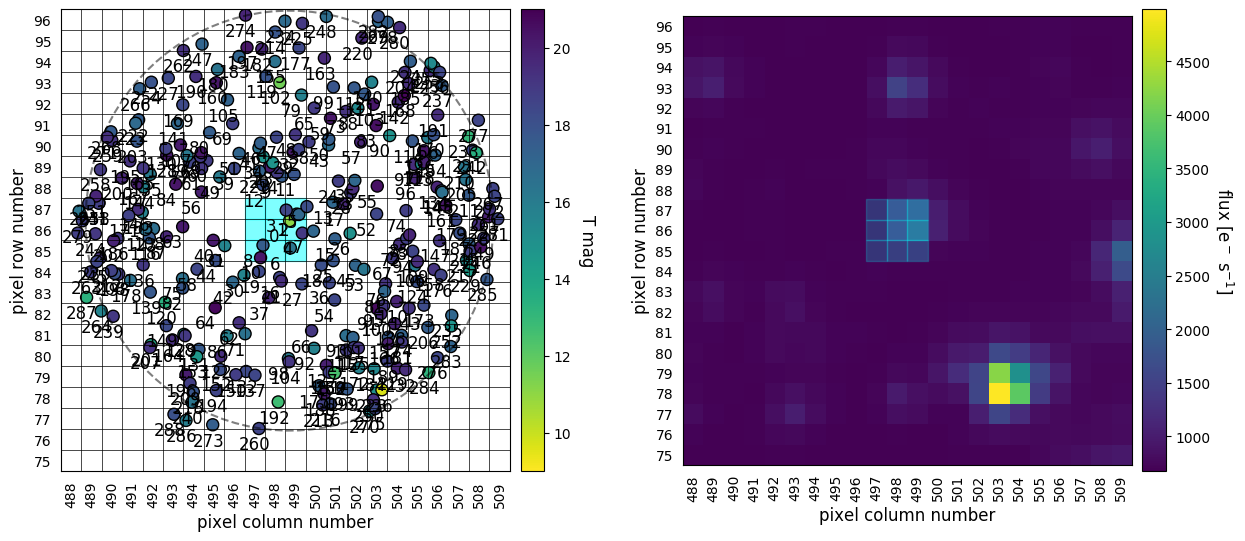

In [18]:
#download tpf file from MAST via lightkurve 
tpf = l.get_tpf_tesscut()

#create aperture mask
mask = cr.parse_aperture_mask(tpf=tpf, 
                              sap_mask='square', 
                              aper_radius=1)
#plot field
l.plot_field(mask=mask)

## get long cadence lightcurve

In [19]:
lc = l.make_custom_lc()

Using lightcurve with custom aperture.
Brightest star detected is far from the center.
Aperture mask is placed at the center instead.

Removing scattered light + applying PLD
Querying Gaia DR2 catalog for ra,dec=(97.6366 29.6723) within 120.0 arcsec.


Using period=1.0914 d, epoch=1843.01 BTJD, duration=2.96 hr
Using biweight filter with window_length=0.37 day


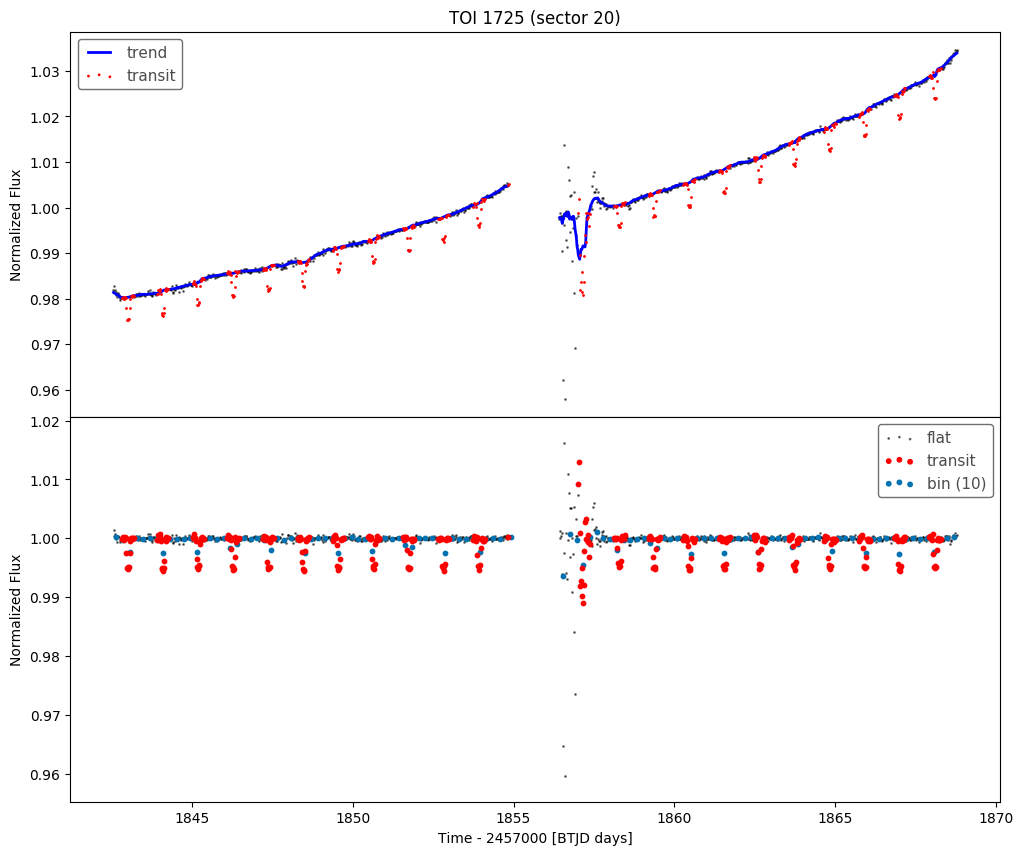

In [20]:
fig = l.plot_trend_flat_lcs(lc)

Using biweight filter with window_length=0.37 day


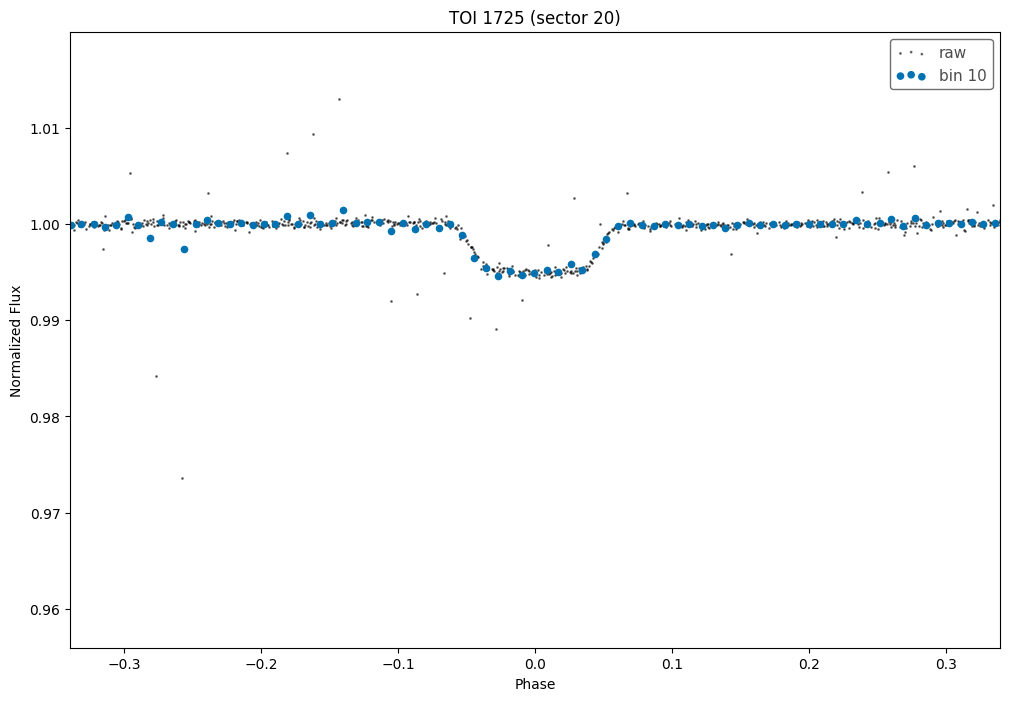

In [21]:
flat = l.get_flat_lc(lc)
ax = l.plot_fold_lc(flat)

In [22]:
stars = l.get_NEB_depths(mask=mask)
stars

,ID,Tmag,ra,dec,mass,rad,Teff,logg,lum,plx,Vmag,Kmag,fluxratio,tdepth
0,86396382,11.0967,97.636653,29.672296,1.17,1.749420,6154.00,4.02046,3.954701,2.312240,11.5690,10.188,9.754143e-01,0.015934
1,721606371,17.4914,97.638770,29.673856,NaN,NaN,NaN,NaN,NaN,-1.015030,NaN,NaN,2.104113e-03,0.000000
2,86396384,17.0451,97.639451,29.673724,NaN,NaN,NaN,NaN,NaN,NaN,18.2666,14.863,2.974550e-03,0.000000
3,86396386,18.4309,97.635554,29.675024,0.64,0.705881,4111.00,4.54678,0.128218,0.311328,19.8676,16.123,1.007023e-03,0.000000
4,721606363,19.0096,97.640627,29.668932,NaN,NaN,NaN,NaN,NaN,-0.762386,20.3447,NaN,4.764859e-04,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,86360042,15.9106,97.606222,29.622927,0.95,0.856950,5441.00,4.54988,0.579856,0.647406,16.7013,14.519,2.392442e-30,0.000000
287,86359996,13.3342,97.575078,29.655678,NaN,8.906480,4841.75,NaN,NaN,0.238461,14.4460,11.482,4.496782e-28,0.000000
288,721606312,18.0054,97.602503,29.624662,NaN,NaN,NaN,NaN,NaN,NaN,18.7739,NaN,5.198685e-31,0.000000
289,721606607,18.7839,97.571996,29.672179,0.69,0.625969,4431.00,4.68381,0.136084,-0.247960,20.0174,NaN,5.660558e-31,0.000000


ETA: 29.1 mins
TRILEGAL form submitted.
Calculating TTP and TEB scenario probabilities for 86396382.
Calculating PTP, PEB, STP, and SEB scenario probabilities for 86396382.
Calculating DTP, DEB, BTP, and BEB scenario probabilities for 86396382.
Run time: 3min 14sec
FPP=1.0000


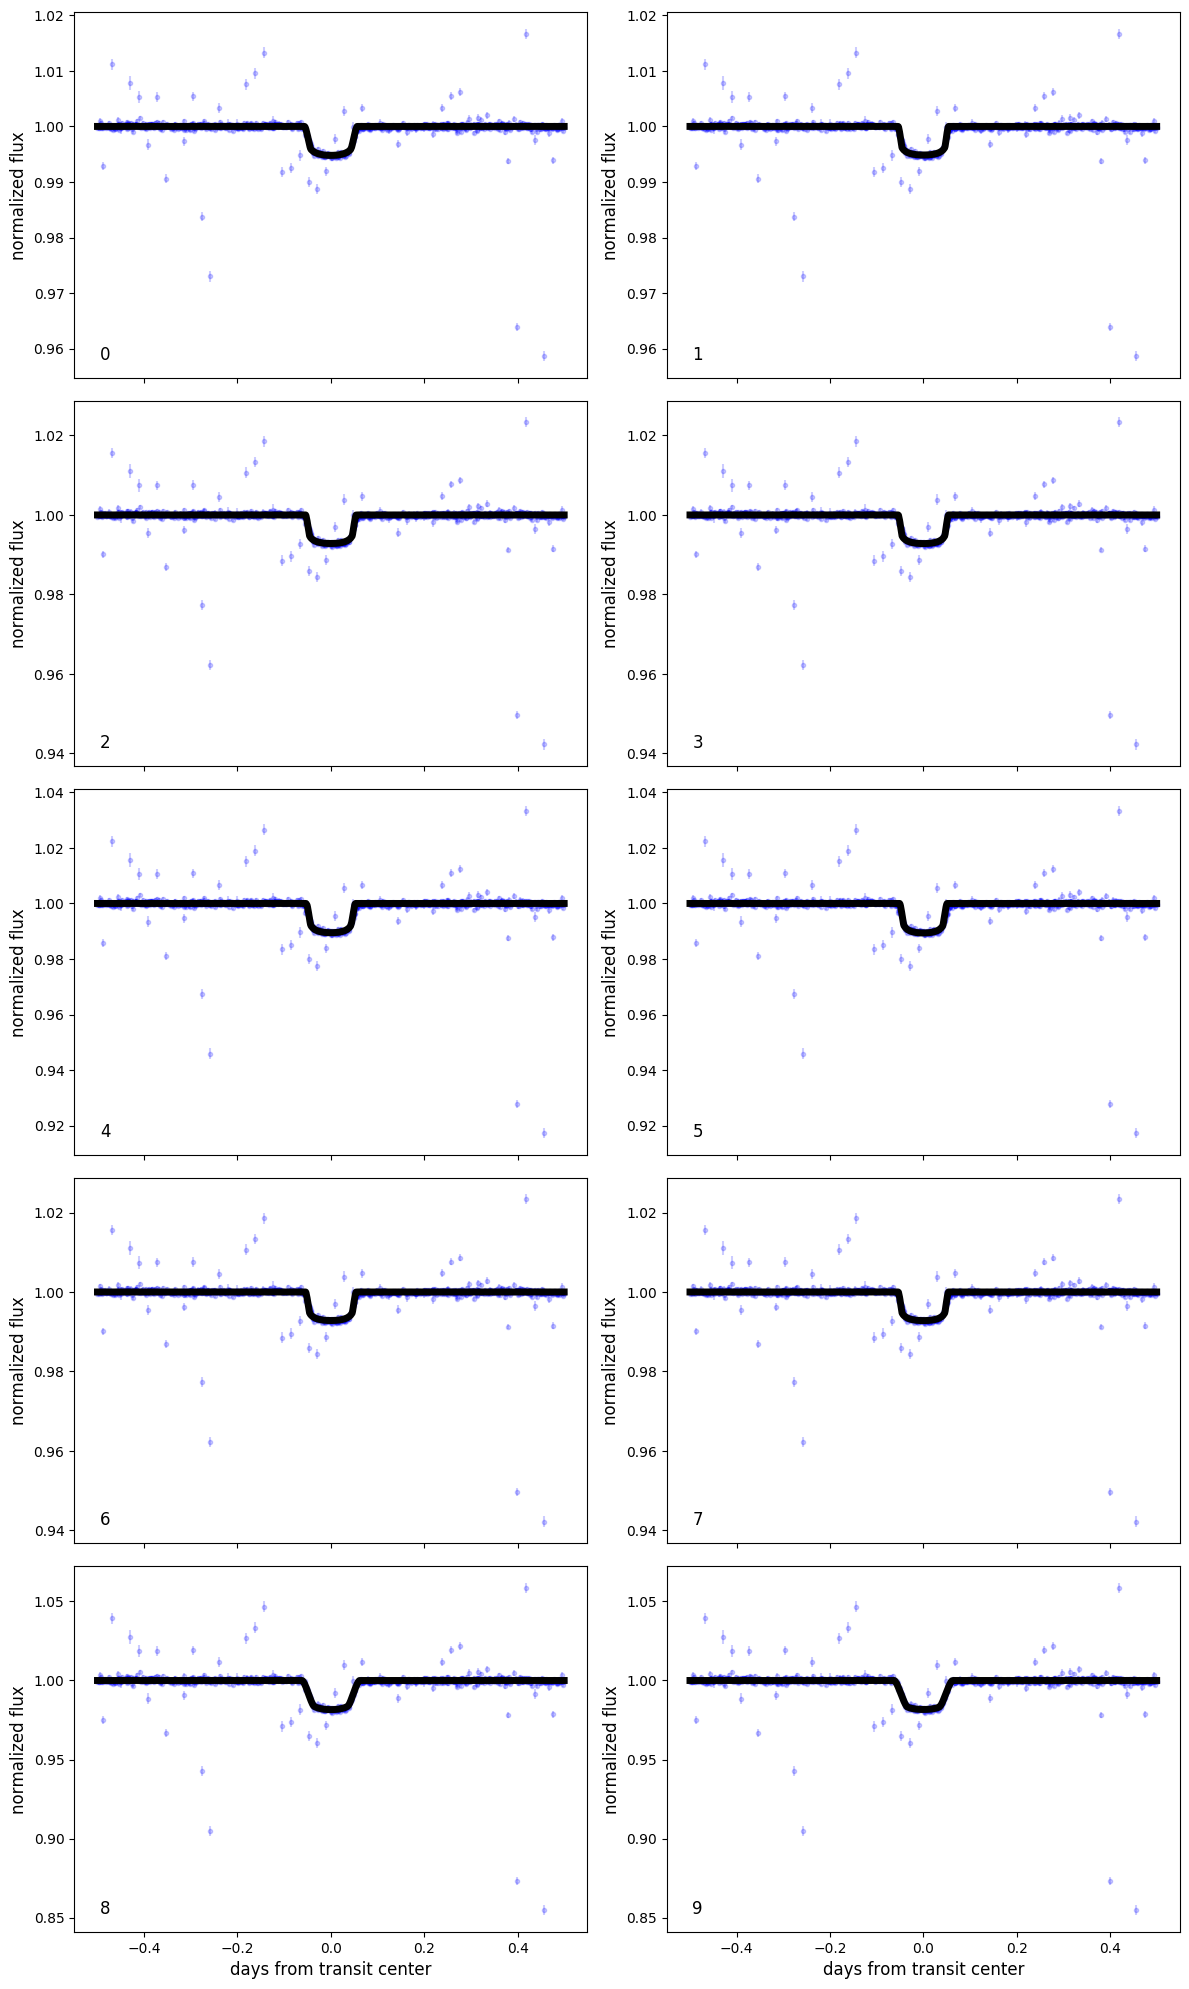

In [23]:
df = l.get_fpp(flat=flat, bin=1, plot=True)

In [24]:
df

,ID,scenario,ms,rs,Teff,lum,fluxratio,Delta_mag,inc,rp,lnL,lnprior,prob
0,86396382,TTP,1.170000,1.749420,6154.0,3.954701,0.000000,-inf,75.372270,13.446248,-32.648010,-11.348366,7.765213e-13
1,86396382,TEB,1.375003,1.523927,6594.0,3.955647,0.000000,-inf,84.043402,0.103160,-75.482435,-11.174426,2.306430e-31
2,86396382,PTP,1.253913,1.395290,6337.0,2.828507,0.284747,1.0,86.225492,12.091656,-68.144278,-12.015056,1.530313e-28
3,86396382,PEB,1.253913,1.395290,6337.0,2.828507,0.284747,1.0,89.999827,0.110661,-72.800537,-11.663216,2.067259e-30
4,86396382,STP,1.138994,1.266116,6082.0,1.976178,0.500000,0.0,89.999931,13.201799,-97.713560,-12.075708,2.073307e-41
5,86396382,SEB,1.138994,1.266116,6082.0,1.976178,0.500000,0.0,89.999898,0.121559,-174.677743,-11.495923,1.391044e-74
6,86396382,DTP,1.253913,1.395290,6337.0,2.828507,0.284747,1.0,86.225492,12.091656,-68.144278,-17.311351,7.667056e-31
7,86396382,DEB,1.253913,1.395290,6337.0,2.828507,0.284747,1.0,89.999827,0.110661,-72.800537,-16.959511,1.035722e-32
8,86396382,BTP,1.930258,2.044753,8000.0,15.428911,0.284747,1.0,75.745078,29.618662,0.000000,-20.553724,1.178061e-02
9,86396382,BEB,2.560989,2.427329,9999.0,53.061235,0.284747,1.0,74.308536,0.324697,-0.703986,-15.420288,9.882194e-01


In [25]:
l.triceratops.FPP

0.9999999999992235